# PROBLEMA

1. Relatórios iniciais a serem apresentados.
<br><br>
2. Explicar a quantidade de vinhos EXPORTADOS. Fatores externos que PODEM VIR A SURGIR que interferem nas analises:

    - Dados climaticos<br>
    - Dados demograficos<br>
    - Dados econômicos<br>
    - Dados de avaliação de vinhos<br><br>

3. Construir uma tabela contendo as seguintes informações: - <strong>CSV CRIADO E EXPORTADO</strong>

    - País de origem (Brasil)<br>
    - Pais de destino<br>
    - Quantidade em litros de vinho exportado (Utiliizar 1KG = 1L)<br>
    - valor em US$ <br>
    

## OBJETIVO

1. Apresentar o montante de venda de exportação nos últimos 15 anos - <strong>GRÁFICO DE VENDA ANUAL CRIADO<strong>

2. Separar a analise por país

3. Trazer as prospeções futuras e possíveis ações para melhoria nas exportações


### Apresentar os dados em:

- Construir gráficos atraentes e com informações de outras bases e sites externos

    * Informações extras, possibilidade, na ba "Publicação" do site apresentado

<br><br>
 

link do site -------------- ['Relatorios Vinicula'](http://vitibrasil.cnpuv.embrapa.br/index.php?subopcao=subopt_04&opcao=opt_06)

# Resolução do problema

#### Exportar base


- Series 2024 - Referente a quantidade exportada
  
- Series 2024.1 - Referente ao valor (US$) exportado


### Ler as bases

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pathlib as ph
import seaborn as sns

In [2]:
Ano_inicial = 2010
Ano_final = 2024

In [3]:
caminho = str(ph.Path().resolve())

path_com = caminho + '\\Comercialização'

path_exp = caminho + '\\Exportação'

path_imp = caminho + '\\Importação'

path_proc = caminho + '\\Processamento'

path_prod = caminho + '\\Produção'

In [4]:
def CSV(caminho, sep=';', relatorio='comercio', derivados='Nan'):

    if ('ImpSuco' in str(caminho)) or ('ProcessaViniferas' in str(caminho)):
        sep=';'
        
    df = pd.read_csv(caminho, sep=sep, on_bad_lines='skip', low_memory=False)
    df['Relatorio'] = relatorio
    df['Derivados'] = derivados
    
    df = df[['Relatorio', 'Derivados'] + list(df.columns[:-2])]
    
    return df


def Ordenar_Dataframe(Base, RenameColumnsOne, RenameColumnsTwo, Cols=['Relatorio', 'País', 'Derivados']):
    
    Agrupamentos_anual = [list(Base.columns[len(Cols):])[i:i+2] for i in range(0, len(list(Base.columns[len(Cols):])), 2)]
    ColPadrao = list(Base.columns[:len(Cols)])
    print(ColPadrao)
    
    df = pd.DataFrame()
    for colunas in Agrupamentos_anual:
        qtde = colunas[0]
        valor = colunas[1]
            
        temp = Base[ColPadrao + colunas]
    
        temp = temp.rename(columns={qtde: RenameColumnsOne, valor: RenameColumnsTwo})
        temp['Ano'] = qtde
    
        if df.shape[0] == 0:
            df = temp.copy()
        else:
            df = pd.concat([df, temp])
    return df

In [5]:
def Ordernar_Dataframe_ano_unitario(Base, RenameColumnsOne, ColsComercio=['Relatorio', 'Produto']):
    ColsComercio = ColsComercio
    
    BaseReturn = pd.DataFrame()
    for coluna in Base.columns[len(ColsComercio):]:
        temp = Base[ColsComercio + [coluna]]
        temp = temp.rename(columns={coluna: RenameColumnsOne})
    
        temp['Ano'] = coluna
    
        if BaseReturn.shape[0] == 0:
            BaseReturn = temp.copy()
        else:
            BaseReturn = pd.concat([BaseReturn, temp], ignore_index=True)
    return BaseReturn

# Ler as bases do Site

### COMERCIO

- Mudar 2024

In [6]:
comercio_base = pd.concat([CSV(cam) for cam in ph.Path(path_com).iterdir()])

comercio_one = comercio_base[['Relatorio', 'control', 'Produto'] + list(comercio_base.columns[-14:])].copy()

comercio_one["2024"] = comercio_one[list(comercio_one.columns[3:])].mean(axis=1)

comercio_one = Ordernar_Dataframe_ano_unitario(comercio_one, 'Litros', ColsComercio=['Relatorio', 'control', 'Produto'])

### IMPORTAÇÃO

- Mudar 2024 e 2024.1

In [7]:
importacao_base = pd.concat([CSV(cam, sep='\t', relatorio='importacao') for cam in ph.Path(path_imp).iterdir()])

importacao_one = importacao_base.drop(columns=['Id'])

IndiceCol = list(importacao_one.columns).index(str(Ano_inicial))

importacao_one = importacao_one[['Relatorio', 'País'] + list(importacao_one.columns[IndiceCol:])]

importacao_one = Ordenar_Dataframe(importacao_one, 'Litros', 'Dolar', Cols=['Relatorio', 'País'])

['Relatorio', 'País']


### EXPORTAÇÃO

- Mudar 2024 e 2024.1

In [8]:
exportacao_base = pd.concat([CSV(cam, sep='\t', relatorio='exportacao', derivados=cam.stem[3:]) for cam in ph.Path(path_exp).iterdir()])

exportacao_one = exportacao_base.drop(columns=['Id'])

IndiceCol = list(exportacao_one.columns).index(str(Ano_inicial))

exportacao_one = exportacao_one[['Relatorio', 'País', 'Derivados'] + list(exportacao_one.columns[IndiceCol:])]

exportacao_one = Ordenar_Dataframe(exportacao_one, 'Litros', 'Dolar')

['Relatorio', 'País', 'Derivados']


### PROCESSAMENTO

- Mudar 2024

In [9]:
processamento_base = pd.concat([CSV(cam, sep='\t', relatorio='processamento') for cam in ph.Path(path_proc).iterdir()])

processamento_one = processamento_base.drop(columns=['id', 'control'])

IndiceCol = list(processamento_one.columns).index(str(Ano_inicial))

processamento_one = processamento_one[['Relatorio', 'cultivar'] + list(processamento_one.columns[IndiceCol:])]

In [10]:
ultimos_anos = [str(ano) for ano in range(2010, 2018)]
processamento_one["2019"] = processamento_one[ultimos_anos].mean(axis=1)

ultimos_anos = [str(ano) for ano in range(2010, 2021)]
processamento_one["2022"] = processamento_one[ultimos_anos].mean(axis=1)

ultimos_anos = [str(ano) for ano in range(2010, 2023)]
processamento_one["2024"] = processamento_one[ultimos_anos].mean(axis=1)

processamento_one = Ordernar_Dataframe_ano_unitario(processamento_one, 'Litros', ColsComercio=['Relatorio', 'cultivar'])

### PRODUÇÃO

- Mudar 2024

In [11]:
producao_base = pd.concat([CSV(cam, relatorio='producao') for cam in ph.Path(path_prod).iterdir()])

producao_one = producao_base.drop(columns=['id', 'produto'])

IndiceCol = list(producao_one.columns).index(str(Ano_inicial))

producao_one = producao_one[['Relatorio', 'control'] + list(producao_one.columns[IndiceCol:])]

ultimos_anos = [str(ano) for ano in range(2010, 2023)]
producao_one["2024"] = producao_one[ultimos_anos].mean(axis=1)

producao_one = Ordernar_Dataframe_ano_unitario(producao_one, 'Litros', ColsComercio=['Relatorio', 'control'])

In [12]:
print(f'Analisar do ano {Ano_inicial} ao ano {Ano_final}')

Analisar do ano 2010 ao ano 2024


# Ajustar as colunas para melhor visualização

In [13]:
display(comercio_one.head()
        , importacao_one.head()
        , exportacao_one.head()
        , processamento_one.head()
        , producao_one.head())

,Relatorio,control,Produto,Litros,Ano
0,comercio,VINHO DE MESA,VINHO DE MESA,221242945.0,2010
1,comercio,vm_Tinto,Tinto,188649074.0,2010
2,comercio,vm_Rosado,Rosado,2036928.0,2010
3,comercio,vm_Branco,Branco,30556943.0,2010
4,comercio,VINHO FINO DE MESA,VINHO FINO DE MESA,21390159.0,2010


,Relatorio,País,Litros,Dolar,Ano
0,importacao,Africa do Sul,8121,37035,2010
1,importacao,Alemanha,1116,5753,2010
2,importacao,Argentina,1086901,3583463,2010
3,importacao,Austrália,0,0,2010
4,importacao,Áustria,0,0,2010


,Relatorio,País,Derivados,Litros,Dolar,Ano
0,exportacao,África do Sul,Espumantes,0,0,2010
1,exportacao,Alemanha,Espumantes,1958,6877,2010
2,exportacao,Angola,Espumantes,104138,672533,2010
3,exportacao,Antigua e Barbuda,Espumantes,0,0,2010
4,exportacao,Antilhas Holandesas,Espumantes,0,0,2010


,Relatorio,cultivar,Litros,Ano
0,processamento,TINTAS,409514092.0,2010
1,processamento,Bacarina,7850.0,2010
2,processamento,Bailey,604895.0,2010
3,processamento,Bordo,89066377.0,2010
4,processamento,Bourdin (S),26990.0,2010


,Relatorio,control,Litros,Ano
0,producao,VINHO DE MESA,195267980.0,2010
1,producao,vm_Tinto,157290088.0,2010
2,producao,vm_Branco,35408083.0,2010
3,producao,vm_Rosado,2569809.0,2010
4,producao,VINHO FINO DE MESA (VINIFERA),24805713.0,2010


## Criar base solicitada pelo Head de Dados

In [14]:
exportacao_one['País Origem'] = 'Brasil'
exportacao = exportacao_one[['Ano', 'Relatorio', 'País Origem', 'País', 'Litros', 'Dolar']].drop_duplicates()

name_col_valor = 'Dolar'
name_col_qtde = 'Litros'

In [15]:
# exportacao_export = exportacao.rename(columns={'Litros': 'Quantidade (L)', 'Dolar': 'Valor em US$'})
# exportacao_export.to_csv('/_Arquivos/Base de Exportação.csv', index=False)

<br><br>

# Análise Exploratória

<br><br>

In [16]:
pd.options.display.float_format = '{:_.2f}'.format

In [17]:
describe_base = exportacao.describe()

In [18]:
describe_text_base = exportacao.describe(exclude='number')

In [19]:
exportacao.Ano.unique()

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype=object)

# ANALISES BÁSICAS

In [20]:
def plotar(base, xcol='País', ycol='Dolar', kind='bar', title='Gráfico de apresentação', ylabel='y', figsize=(10,5)):
    
    ax = base.plot(kind=kind, x=xcol, y=ycol, figsize=figsize, legend=False)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:_.2f}'))
    plt.title(title)
    plt.grid(True, linestyle=':', alpha=0.3)
    plt.ylabel(ylabel)
    plt.xticks(rotation=55)
    # Adiciona rótulos nas barras com separador de milhar por underline
    if kind == 'bar':
        for p in ax.patches:
            altura = p.get_height()
            ax.text(p.get_x() + p.get_width()/2, altura,
                    f'{int(altura):_}', ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

### Limpeza da base

In [95]:
base_exportacao = exportacao_one.groupby(['País Origem', 'País'])[['Litros', 'Dolar']].sum().reset_index()

from unicodedata import normalize, combining
# !pip install re
from re import sub

def tratar_texto(texto):
    texto = normalize('NFKD', texto)
    texto = ''.join([c for c in texto if not combining(c)])
    texto = texto.lower()
    texto = sub(r'[^a-z0-9\s]', '', texto)
    return texto

error = [['trinidade tobago', 'trinidade e tobago'], ['alemanha republica democratica', 'alemanha republica democratica da'],
    ['bosniaherzegovina'], ['coreia do sul republica da', 'coreia republica sul']]

correct = ['trindade e tobago', 'alemanha', 'bosnia', 'coreia do sul']

base_exportacao.País = base_exportacao.País.apply(tratar_texto)
for i, erro in enumerate(error):
    base_exportacao.loc[base_exportacao.País.isin(erro), 'País'] = correct[i]

base_exportacao = base_exportacao.groupby(['País Origem', 'País'])[['Litros', 'Dolar']].sum().reset_index()
base_exportacao = base_exportacao.rename(columns={'Litros': 'Quantidade (L)', 'Dolar': 'Valor em US$'})

base_exportacao = base_exportacao[base_exportacao.País != 'outros1']

base_exportacao.to_csv('Base exportação.csv', index=False)

## TOTAL POR PAIS

- 10 menores e 10 maiores

In [22]:
exportacao_end = exportacao.copy()
exportacao_end.País = exportacao_end.País.apply(tratar_texto)
for i, erro in enumerate(error):
    exportacao_end.loc[exportacao_end.País.isin(erro), 'País'] = correct[i]

exportacao_end = exportacao_end.groupby(['Ano', 'Relatorio', 'País Origem', 'País'])[['Litros', 'Dolar']].sum().reset_index()
exportacao_end = exportacao_end[exportacao_end.País != 'outros1']

In [23]:
pais_total = exportacao_end.groupby('País')[name_col_valor].sum().reset_index()

pais_total[name_col_valor] = pais_total[name_col_valor].astype(float)

pais_total = pais_total[pais_total[name_col_valor] > 0].sort_values(name_col_valor)

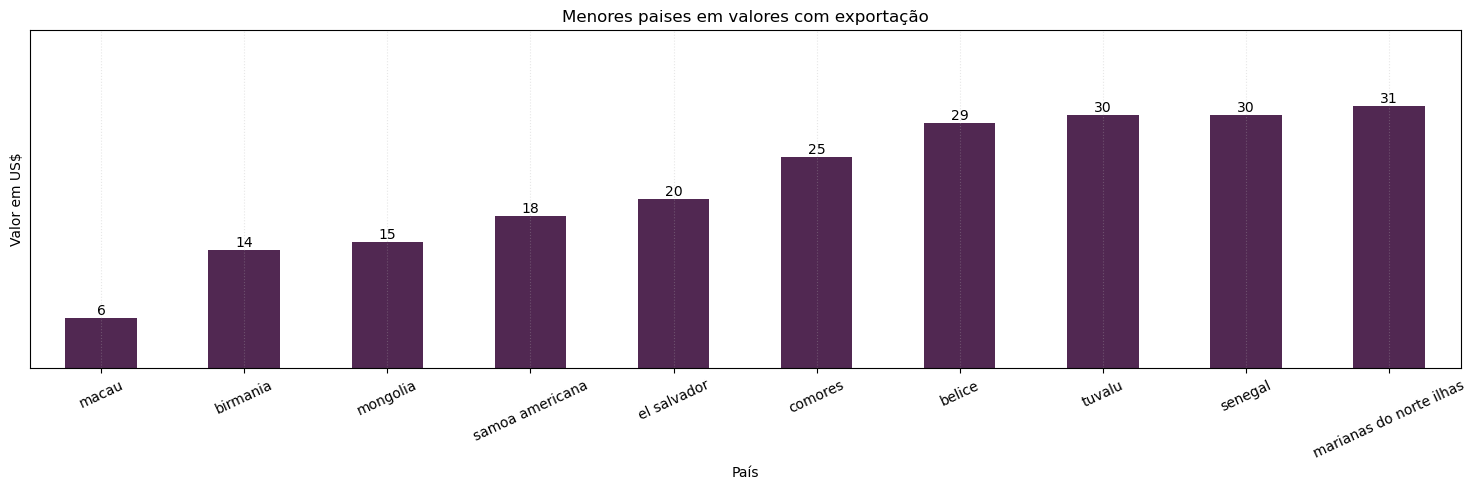

In [24]:
menores_paises = pais_total.nsmallest(10, name_col_valor)
# plotar(menores_paises, title='Menores paises em valores com exportação', ylabel='Valor em US$')

ax = menores_paises.plot(kind='bar', x='País', y='Dolar', figsize=(15,5), legend=False, color='#512852')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:_.2f}'))
plt.title('Menores paises em valores com exportação')
plt.grid(True, linestyle=':', alpha=0.3)
plt.ylabel('Valor em US$')
plt.xticks(rotation=25)
plt.yticks([])
plt.ylim(0, 40)
# Adiciona rótulos nas barras com separador de milhar por underline
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, altura,
            f'{int(altura):_}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

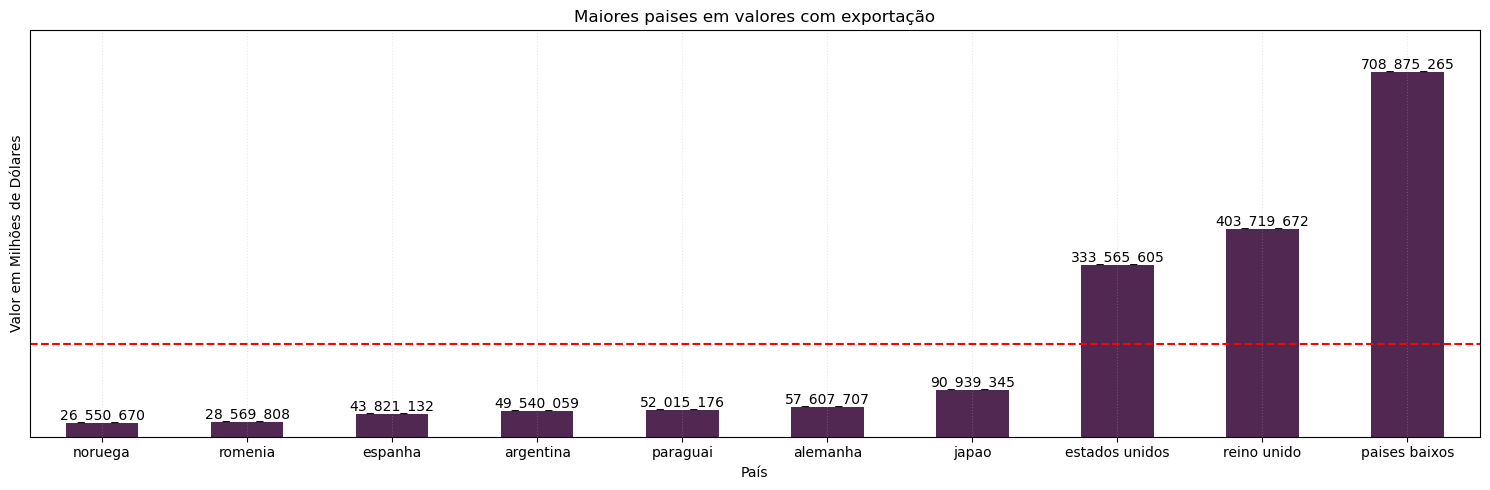

In [25]:
maiores_paises = pais_total.nlargest(10, name_col_valor).sort_values(name_col_valor, ascending=True)
max_val = maiores_paises.Dolar.max() * 1.3
media_max = maiores_paises.Dolar.sum() / 10

ax = maiores_paises.plot(kind='bar', x='País', y='Dolar', figsize=(15,5), legend=False, color='#512852')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:_.2f}'))
plt.title('Maiores paises em valores com exportação')
plt.grid(True, linestyle=':', alpha=0.3)
plt.ylabel('Valor em Milhões de Dólares')
plt.yticks([])
plt.xticks(rotation=0)
plt.ylim(0,790_000_000)
# Média
plt.axhline(media_max, color='red', linestyle='--', label=f'Média = {media_max:.2f}')
# Adiciona rótulos nas barras com separador de milhar por underline

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, altura,
            f'{int(altura):_}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<br><br>

## Evolução temporal

<br><br>

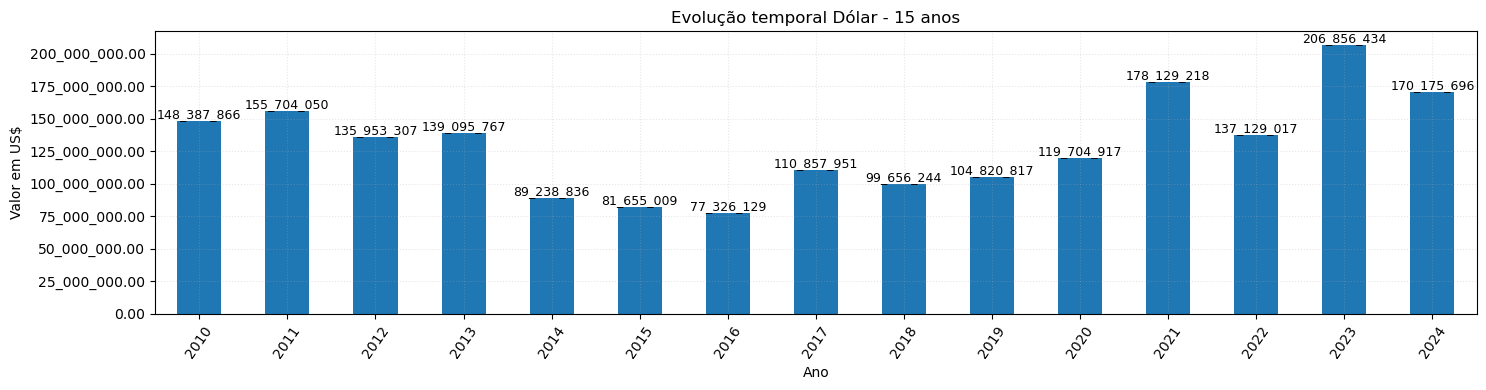

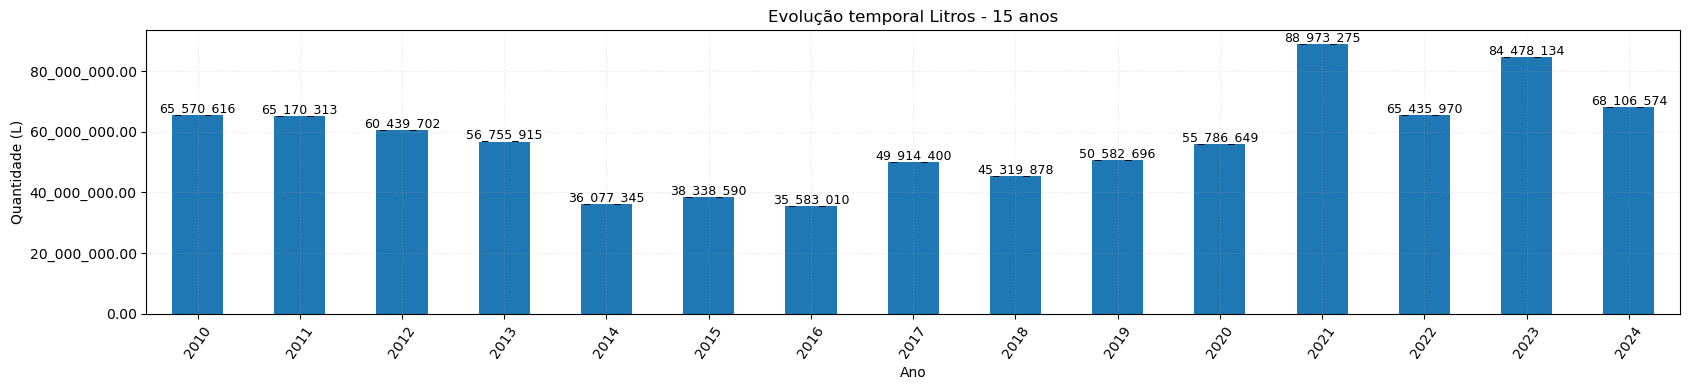

In [26]:
temporal = exportacao_end.groupby('Ano')[[name_col_qtde, name_col_valor]].sum().reset_index()

grafico1 = plotar(temporal, xcol='Ano', ycol='Dolar', figsize=(15,4), title='Evolução temporal Dólar - 15 anos', ylabel='Valor em US$')

plotar(temporal, xcol='Ano', ycol=name_col_qtde, figsize=(17,4), title='Evolução temporal Litros - 15 anos', ylabel='Quantidade (L)')

<br>

### Evolução temporal - 10 maiores compradores

<br>

In [27]:
temporal_top_10 = exportacao_end[exportacao_end.País.isin(list(maiores_paises.País.unique()))]

temporal_top_10 = temporal_top_10.groupby('Ano')[[name_col_qtde, name_col_valor]].sum().reset_index()

# plotar(temporal_top_10, xcol='Ano', ycol=name_col_valor, figsize=(17,4), title='Evolução temporal Dólar - 15 anos', ylabel='Valor em US$')


# plotar(temporal_top_10, xcol='Ano', ycol=name_col_qtde, figsize=(17,4), title='Evolução temporal Litros - 15 anos', ylabel='Quantidade (L)') 

<br>

### Evolução temporal - 10 menores compradores

<br>

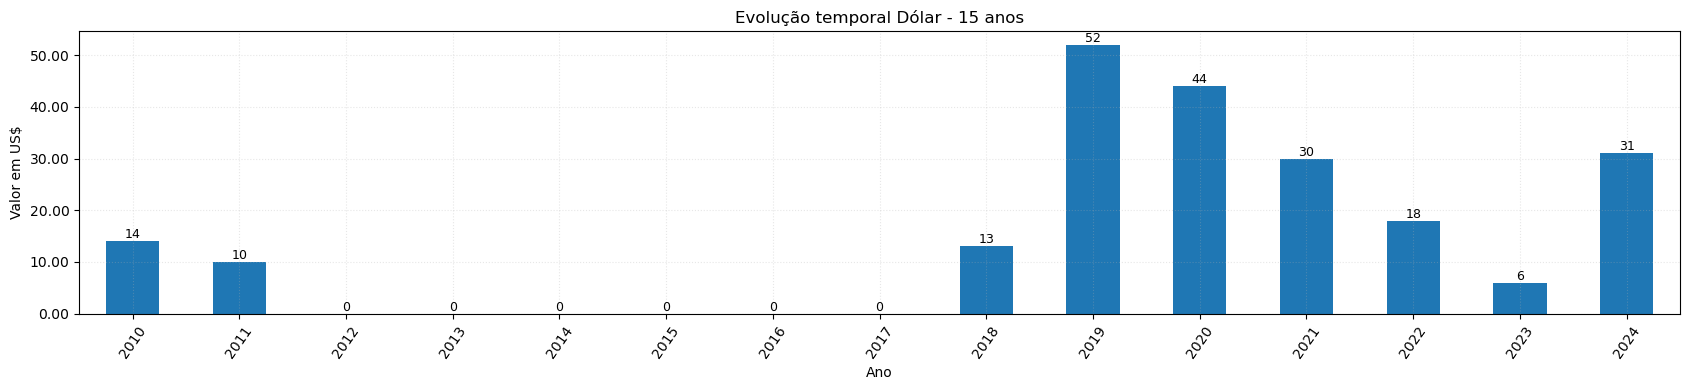

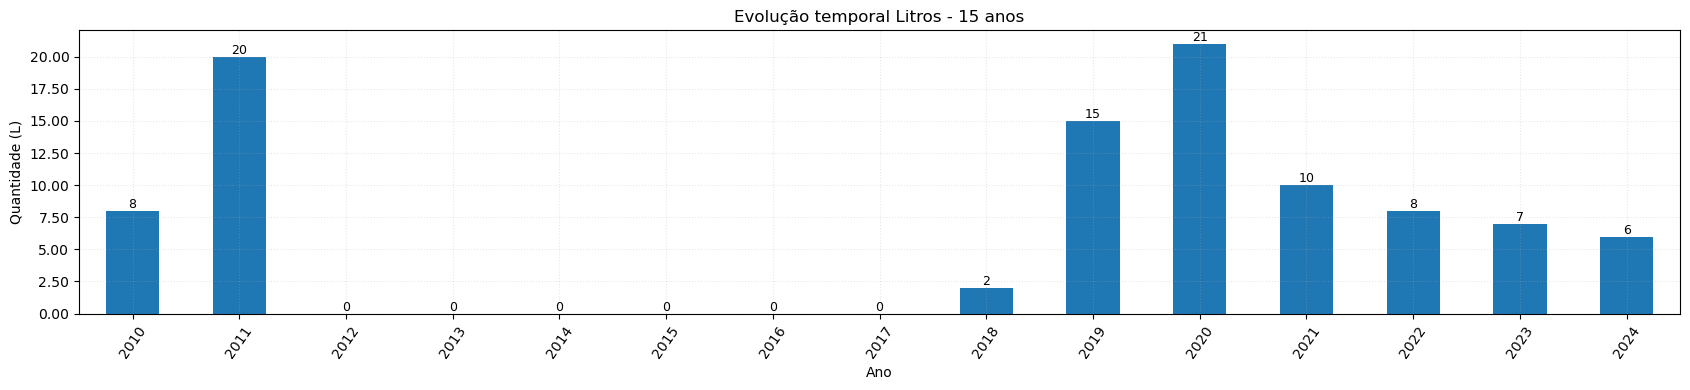

In [28]:
temporal_top_10 = exportacao_end[exportacao_end.País.isin(list(menores_paises.País.unique()))]

temporal_top_10 = temporal_top_10.groupby('Ano')[[name_col_qtde, name_col_valor]].sum().reset_index()

plotar(temporal_top_10, xcol='Ano', ycol=name_col_valor, figsize=(17,4), title='Evolução temporal Dólar - 15 anos', ylabel='Valor em US$')
plotar(temporal_top_10, xcol='Ano', ycol=name_col_qtde, figsize=(17,4), title='Evolução temporal Litros - 15 anos', ylabel='Quantidade (L)') 

## Representação percentual % dos valores

In [29]:
percentual_exp = exportacao_end.copy()
percentual_exp['% Litros'] = (percentual_exp['Litros'] / percentual_exp['Litros'].sum()) * 100

percentual_exp

,Ano,Relatorio,País Origem,País,Litros,Dolar,% Litros
0,2010,exportacao,Brasil,afeganistao,0,0,0.00
1,2010,exportacao,Brasil,africa do sul,0,0,0.00
2,2010,exportacao,Brasil,alemanha,743615,1582972,0.09
3,2010,exportacao,Brasil,angola,144108,870532,0.02
4,2010,exportacao,Brasil,anguilla,0,0,0.00
...,...,...,...,...,...,...,...
2815,2024,exportacao,Brasil,uruguai,239950,610360,0.03
2816,2024,exportacao,Brasil,vanuatu,7,16,0.00
2817,2024,exportacao,Brasil,venezuela,141914,236711,0.02
2818,2024,exportacao,Brasil,vietna,21,62,0.00


<br><br>

# ANÁLISE ECÔNOMICA - BASE WORLD BANK

<br><br>

In [30]:
per_capita_munial = pd.read_csv('GDP Per capita.csv')
per_capita_munial = per_capita_munial.drop(columns=['Series Name', 'Series Code', 'Country Code', '2009 [YR2009]'])
per_capita_munial = per_capita_munial.rename(columns={'Country Name': 'País'})

In [31]:
try:
    from deep_translator import GoogleTranslator
except:
    !pip install deep_translator
    from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='en', target='pt')

def translator_text(text):
    return translator.translate(text)

per_capita_munial.loc[per_capita_munial['País'].notna(), 'País'] = (
    per_capita_munial.loc[per_capita_munial['País'].notna(), 'País']
    .apply(translator_text)
)

per_capita_munial = per_capita_munial[per_capita_munial['País'].notnull()]

In [32]:
import numpy as np

for coluna in per_capita_munial.columns[1:]:
    per_capita_munial.loc[(per_capita_munial[coluna] == '..') | (per_capita_munial[coluna] == ''), coluna] = np.nan
    per_capita_munial = per_capita_munial.rename(columns={coluna: coluna[:4]})
    per_capita_munial[coluna[:4]] = per_capita_munial[coluna[:4]].astype(float)

ultimos_anos = [str(ano) for ano in range(2010, 2023)]
per_capita_munial["2024"] = per_capita_munial[ultimos_anos].mean(axis=1)

In [33]:
Renda_Mundial = Ordernar_Dataframe_ano_unitario(per_capita_munial, RenameColumnsOne='Valor Percapita', ColsComercio=['País'])
Renda_Mundial = Renda_Mundial.rename(columns={'Valor Percapita': 'renda_per_capita'})
Renda_Mundial.renda_per_capita = Renda_Mundial.renda_per_capita.astype(float)
Renda_Mundial.sort_values('renda_per_capita', ascending=True).head()

,País,renda_per_capita,Ano
3489,Burundi,193.01,2023
2691,Burundi,210.01,2020
2425,Burundi,210.24,2019
2957,Burundi,214.09,2021
31,Burundi,216.73,2010


# CRUZAMENTO DA BASE DE EXPORTAÇÃO COM BASE PER CAPITA GDP

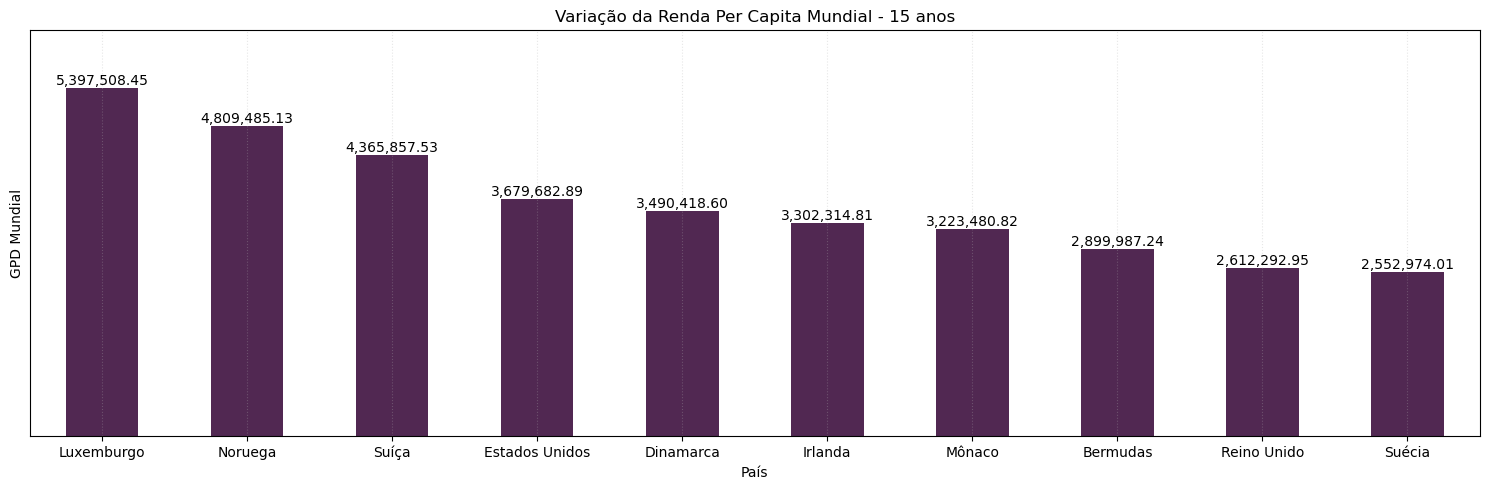

In [84]:
exportacao_GDP = pd.merge(exportacao, Renda_Mundial, how='inner', on=['Ano', 'País'])

scatter = exportacao_GDP.groupby('País')[['Dolar', 'renda_per_capita']].sum().reset_index()

scatter = scatter.sort_values('renda_per_capita', ascending=False).head(10)

ax = scatter.plot(kind='bar', x='País', y='renda_per_capita', figsize=(15,5), legend=False, color='#512852')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))  # Formato no eixo Y

plt.title('Variação da Renda Per Capita Mundial - 15 anos')
plt.grid(True, linestyle=':', alpha=0.3)
plt.ylabel('GPD Mundial')
plt.yticks([])
plt.xticks(rotation=0)
plt.ylim(0, 6_300_000)

# Rótulos de dados com 2 casas decimais e separador de milhar
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, altura + 0.05,
            f'{altura:,.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

,renda_per_capita,Litros
renda_per_capita,1.00,0.08
Litros,0.08,1.00


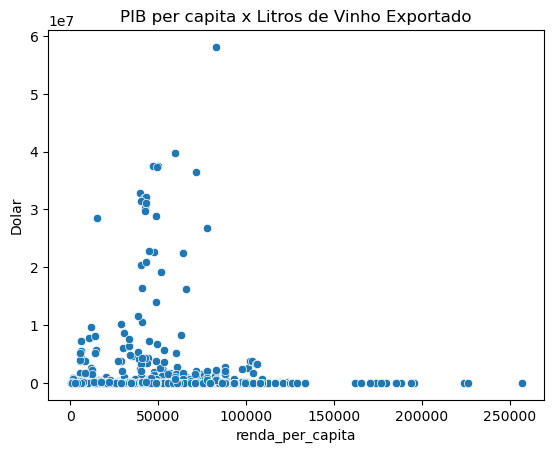

In [45]:
## Correlação do PIB mundial - GDP vs Dolar exportado

correlacao = exportacao_GDP[['renda_per_capita', 'Litros']].corr()
display(correlacao)

sns.scatterplot(data=exportacao_GDP, x='renda_per_capita', y='Dolar')
plt.title('PIB per capita x Litros de Vinho Exportado');

- O valor ecônomico per capita por país não determina a maior ou menor compra do país. O fator é outro.

## Preço Médio por Litro

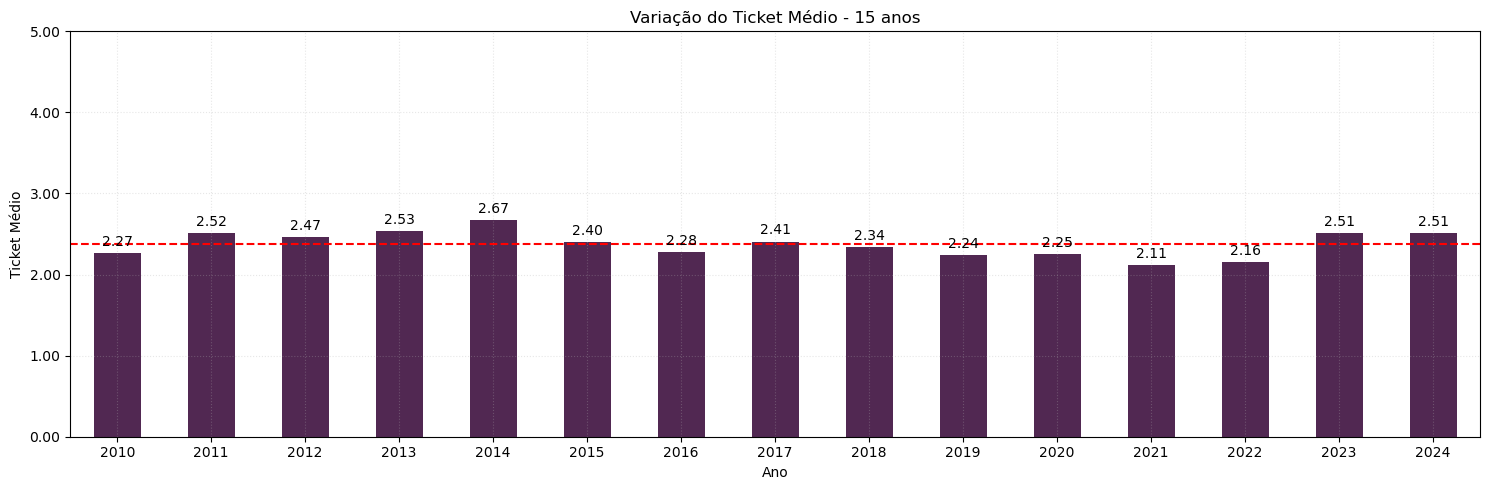

In [46]:
preco_medio = exportacao_GDP.groupby('Ano')[['Litros', 'Dolar']].sum().reset_index()
preco_medio['Ticket_medio'] = preco_medio.Dolar / preco_medio.Litros

# Cálculo da média
media_max = preco_medio['Ticket_medio'].mean()

# Plot
ax = preco_medio.plot(kind='bar', x='Ano', y='Ticket_medio', figsize=(15,5), legend=False, color='#512852')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))  # Formato no eixo Y

plt.title('Variação do Ticket Médio - 15 anos')
plt.grid(True, linestyle=':', alpha=0.3)
plt.ylabel('Ticket Médio')
plt.xticks(rotation=0)
plt.ylim(0, 5)

# Linha da média
plt.axhline(media_max, color='red', linestyle='--', label=f'Média = {media_max:.2f}')

# Rótulos de dados com 2 casas decimais e separador de milhar
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, altura + 0.05,
            f'{altura:,.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [47]:
preco_medio.set_index('Ano').mean()

Litros         32_619_567.93
Dolar          77_044_011.60
Ticket_medio            2.38
dtype: float64

<br><br>

### Análise

- O aumento do Ticket Médio manter um padrão, pode indicar algumas coisas:

    - Aumento de exportação via volume, não via valor:
        - Pode ser que o mercado internacional consuma em maior escala, mas não tenha disposição para pagar mais.
        - Pode ser pela volatilidade do dólar
    - Concorrência internacional forte
        - estabilidade de preço pela competitivida do mercado


##### Análise do dólar no periodo

- fonte - Ipeadata

http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=31924

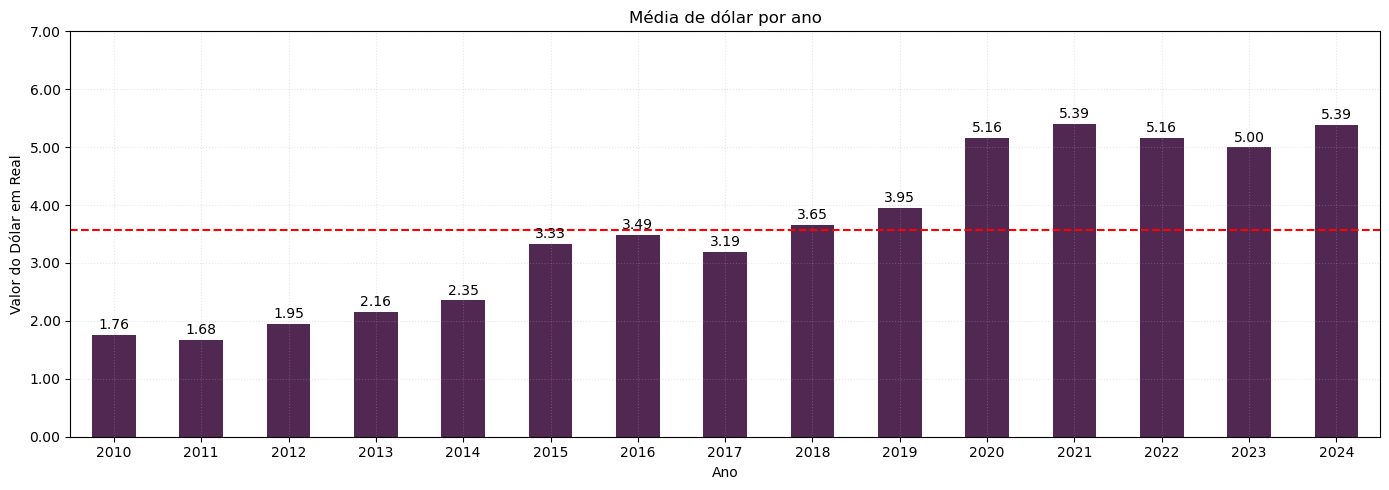

In [48]:
dolar = '''
Ano	Valor
2010	1,7603
2011	1,6750
2012	1,9546
2013	2,1576
2014	2,3534
2015	3,3315
2016	3,4901
2017	3,1920
2018	3,6542
2019	3,9451
2020	5,1558
2021	5,3950
2022	5,1648
2023	4,9950
2024	5,3895
'''
from io import StringIO

dado_ipedata = StringIO(dolar)

ipedata = pd.read_csv(dado_ipedata, sep="\t")
ipedata['Valor'] = ipedata['Valor'].str.replace(',', '.')
ipedata['Valor'] = ipedata['Valor'].astype(float)

# plotar(ipedata, xcol='Ano', ycol='Valor', title='Média de dólar por ano', ylabel='Valor do Dólar em Real')
# plotar(temporal, xcol='Ano', ycol=name_col_valor, figsize=(17,4), title='Evolução temporal Dólar - 15 anos')

media_max = ipedata.Valor.mean()

ax = ipedata.plot(kind='bar', x='Ano', y='Valor', figsize=(14,5), legend=False, color='#512852')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:_.2f}'))

plt.axhline(media_max, color='red', linestyle='--', label=f'Média = {media_max:.2f}')

plt.title('Média de dólar por ano')
plt.grid(True, linestyle=':', alpha=0.3)
plt.ylabel('Valor do Dólar em Real')
plt.xticks(rotation=0)
# Adiciona rótulos nas barras com separador de milhar por underline

plt.ylim(0, 7)

# Rótulos de dados com 2 casas decimais e separador de milhar
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, altura + 0.05,
            f'{altura:,.2f}', ha='center', va='bottom', fontsize=10)
    
plt.tight_layout()
plt.show()

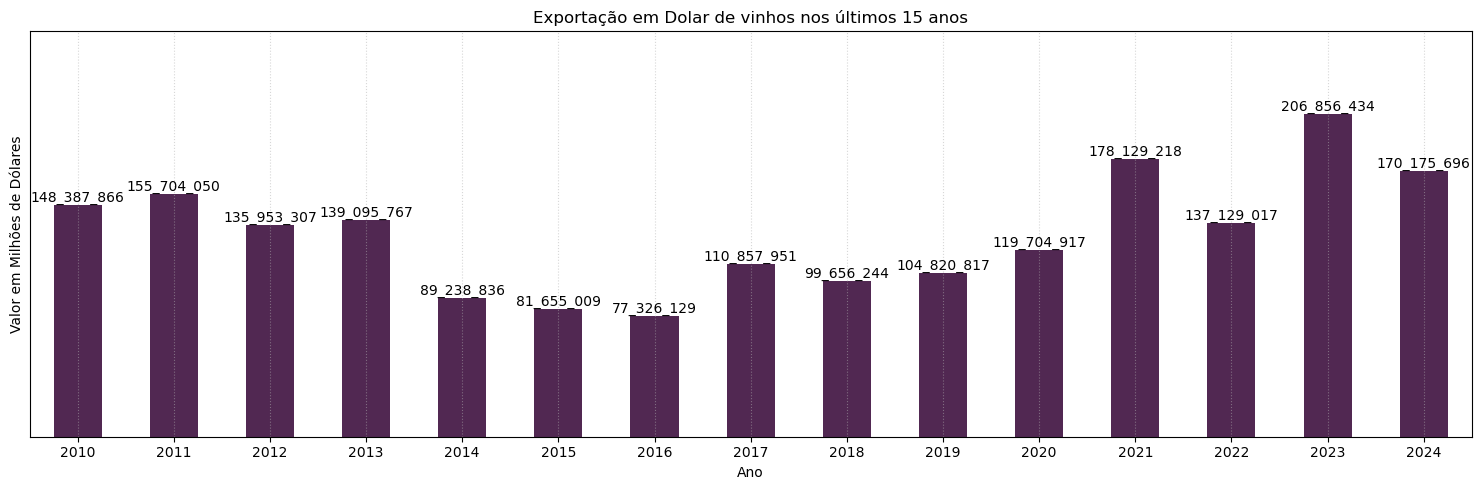

In [51]:
base_full = exportacao.groupby('Ano')['Dolar'].sum().reset_index()

ax = base_full.plot(kind='bar', x='Ano', y='Dolar', figsize=(15,5), legend=False, color='#512852')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:_.2f}'))
plt.title('Exportação em Dolar de vinhos nos últimos 15 anos')
plt.grid(True, linestyle=':', alpha=0.5)
plt.ylabel('Valor em Milhões de Dólares')
plt.yticks([])
plt.xticks(rotation=0)
plt.ylim(0,260_000_000)
# Adiciona rótulos nas barras com separador de milhar por underline

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, altura,
            f'{int(altura):_}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Análise

- Dólar alto não garantiu alta nas exportações
    - Em 2015–2016, o dólar estava subindo (~3,5), mas as exportações caíram fortemente.
 
- Aumento das exportações em dólar coincide com dólar forte pós-2020
    - Em 2020–2021, com o dólar a R$5, o valor exportado aumenta muito.

    - Isso pode indicar que o vinho brasileiro ficou mais competitivo no exterior (mais barato para estrangeiros), estimulando as vendas.
 
- Mesmo com dólar alto em 2022, houve uma queda

    - Instabilidade logística pós-pandemia

    - Concorrência mais forte

    - Falta de estratégia comercial

## Paises baixos

In [53]:
paises_baixos = exportacao[exportacao.País.str.lower().isin(['países baixos', 'estados unidos', 'reino unido'])].copy()

paises_baixo_analise = paises_baixos.groupby(['Ano', 'País'])[[name_col_qtde, name_col_valor]].sum().reset_index()

paises_baixo_analise[['Dolar', 'Litros']] = paises_baixo_analise[['Dolar', 'Litros']] / 1_000_000

# def plotar(df, xcol, ycol, title='', figsize=(17, 4), hue=None):
#     plt.figure(figsize=figsize)
#     ax = sns.barplot(data=df, x=xcol, y=ycol, hue=hue)

#     # Adiciona valores nas barras
#     for container in ax.containers:
#         ax.bar_label(container, fmt='%.0f', fontsize=9)

#     # Ajuste da legenda fora do gráfico (lado direito)
#     if hue:
#         ax.legend(title=hue, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#     plt.title(title)
#     plt.xlabel(xcol)
#     plt.ylabel('MILHÕES EM ' + ycol.upper())
#     plt.ylim(0, 100)
#     plt.xticks(rotation=45)
#     plt.tight_layout(rect=[0, 0, 0.85, 1])  # espaço extra à direita
#     plt.show()

# plotar(
#     paises_baixo_analise,
#     xcol='Ano',
#     ycol=name_col_valor,
#     hue='País',
#     title='Evolução temporal Dólar - Países'
# )

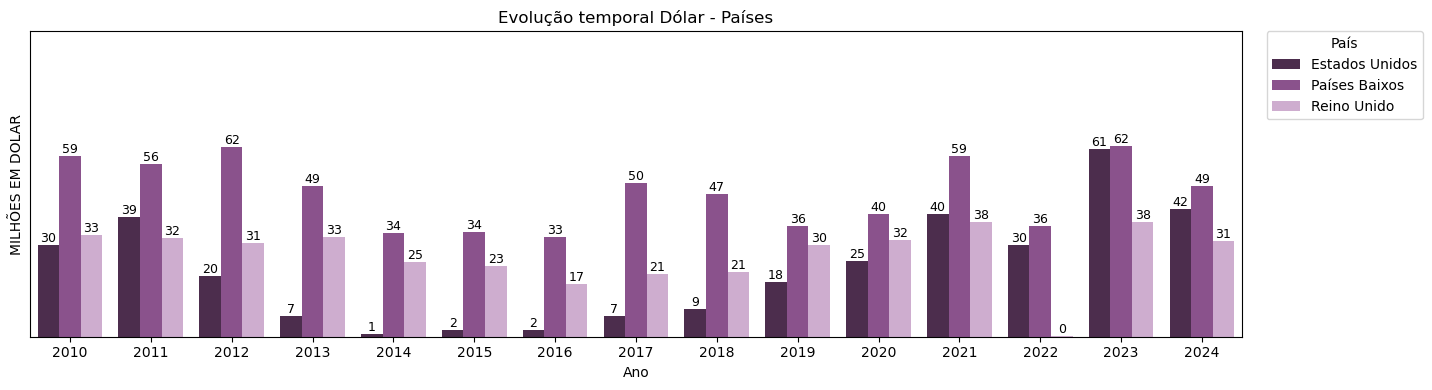

In [54]:
plt.figure(figsize=(17, 4))
ax = sns.barplot(data=paises_baixo_analise, x='Ano', y=name_col_valor, hue='País', palette=['#512852', '#934995', '#D3A8D4'])

# Adiciona valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)

# Ajuste da legenda fora do gráfico (lado direito)
ax.legend(title='País', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Evolução temporal Dólar - Países')
plt.xlabel('Ano')
plt.ylabel('MILHÕES EM ' + name_col_valor.upper())
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Remove os números do eixo Y
ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# BASE DE PRODUÇÃO

- Fortes chuvas/granizo em Santa Catarina e Rio Grande do Sul (Brasil)
    - > Reducao de 50% da safra em 2015


<br><br>

## Visão Macro

<br><br>

<Axes: xlabel='Ano'>

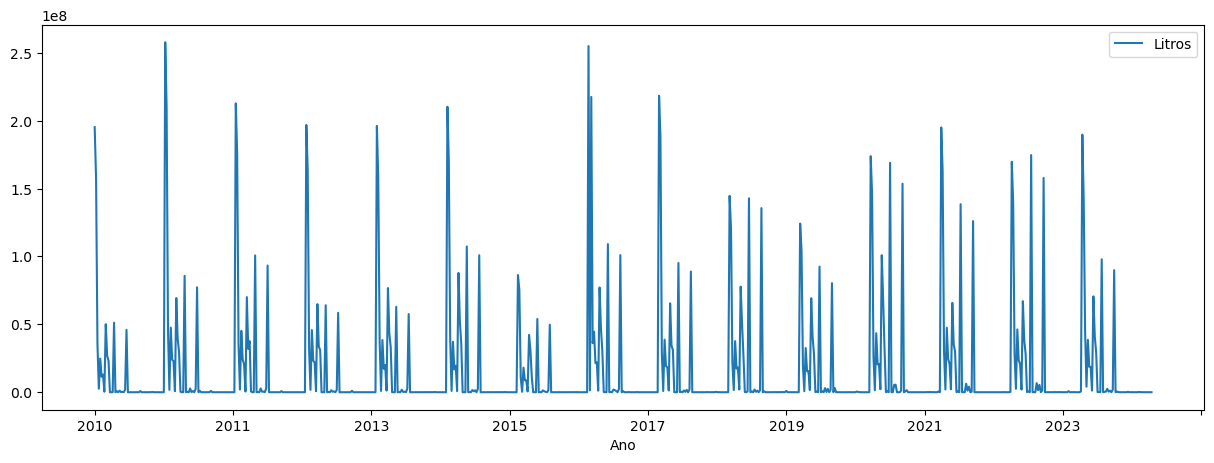

In [55]:

producao_one.plot(x='Ano', y='Litros', figsize=(15,5))


<br><br>

## Segmento por tipo de uva - CONTROL

<br><br>

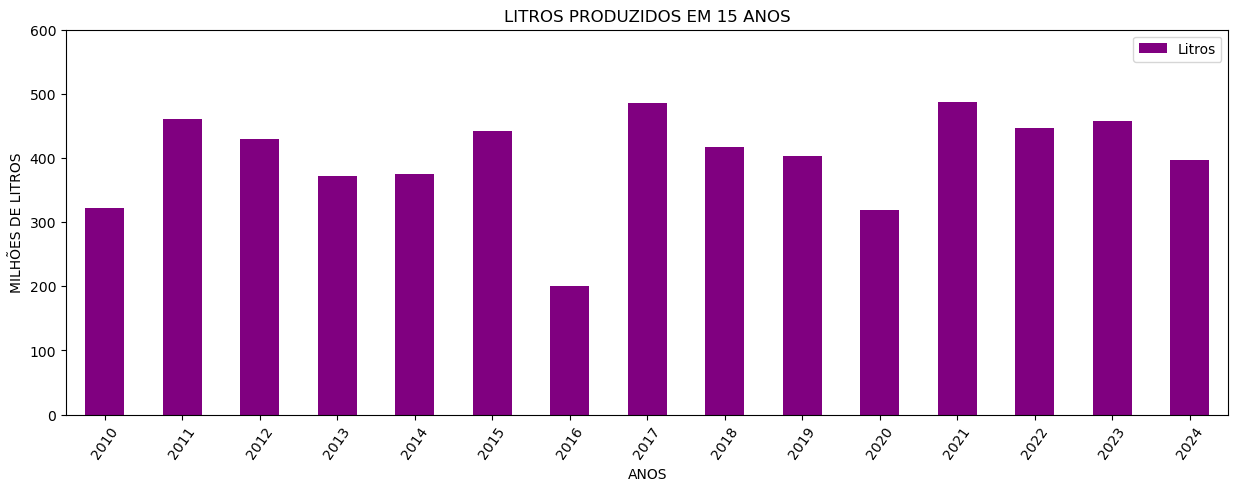

In [56]:
base_producao_filter = producao_one[producao_one.control.isin(['DERIVADOS', 'SUCO', 'VINHO DE MESA', 'VINHO FINO DE MESA (VINIFERA)'])]

produto_full = base_producao_filter.groupby('Ano').Litros.sum().reset_index()
produto_full['Litros'] = produto_full['Litros'] / 1_000_000


produto_full.plot(kind='bar', x='Ano', y='Litros', figsize=(15,5), color='purple')
plt.title('LITROS PRODUZIDOS EM 15 ANOS')
plt.ylabel('MILHÕES DE LITROS')
plt.xlabel('ANOS')
plt.ylim(0, 600)
plt.xticks(rotation=55);

<br>

- > As fortes chuvas e quedas de granizo que afetaram Santa Catarina e o Rio Grande do Sul em 2015 ocorreram principalmente nos meses de setembro e outubro. Esses eventos climáticos extremos, intensificados pelo fenômeno El Niño, causaram prejuízos significativos na agricultura, incluindo uma redução de até 50% na safra de trigo em algumas regiõe

<br>

- > Considerar os produtos

- 'VINHO FINO DE MESA (VINIFERA)' - Retirado da análise, pois é vendido apensa em território nacional

- > A análise se basea em exportação

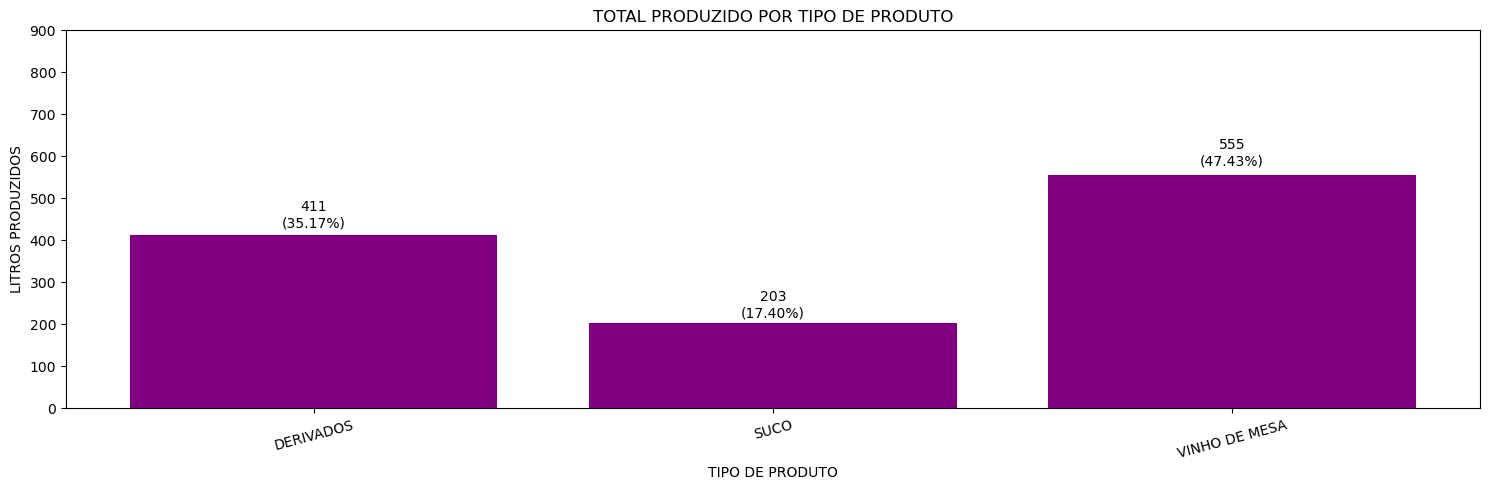

In [57]:
producao_one = producao_one[producao_one.control.isin(['DERIVADOS', 'SUCO', 'VINHO DE MESA'])]

producao_one = producao_one[producao_one.Ano.isin(['2024', '2023', '2022'])]

produtos = producao_one.groupby('control').Litros.sum().reset_index()
produtos['Litros'] = produtos['Litros'] / 1_000_000
produtos['%'] = ((produtos.Litros / produtos.Litros.sum()) * 100).round(2)

plt.figure(figsize=(15, 5))
bars = plt.bar(produtos['control'], produtos['Litros'], color='purple')

# Adiciona os valores numéricos e as porcentagens nas barras
for bar, litros, perc in zip(bars, produtos['Litros'], produtos['%']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.03*height,
             f'{litros:,.0f}\n({perc:.2f}%)', 
             ha='center', va='bottom', fontsize=10)

plt.title('TOTAL PRODUZIDO POR TIPO DE PRODUTO')
plt.ylabel('LITROS PRODUZIDOS')
plt.xlabel('TIPO DE PRODUTO')
plt.xticks(rotation=15)
plt.ylim(0, 900)
plt.tight_layout()
plt.show()

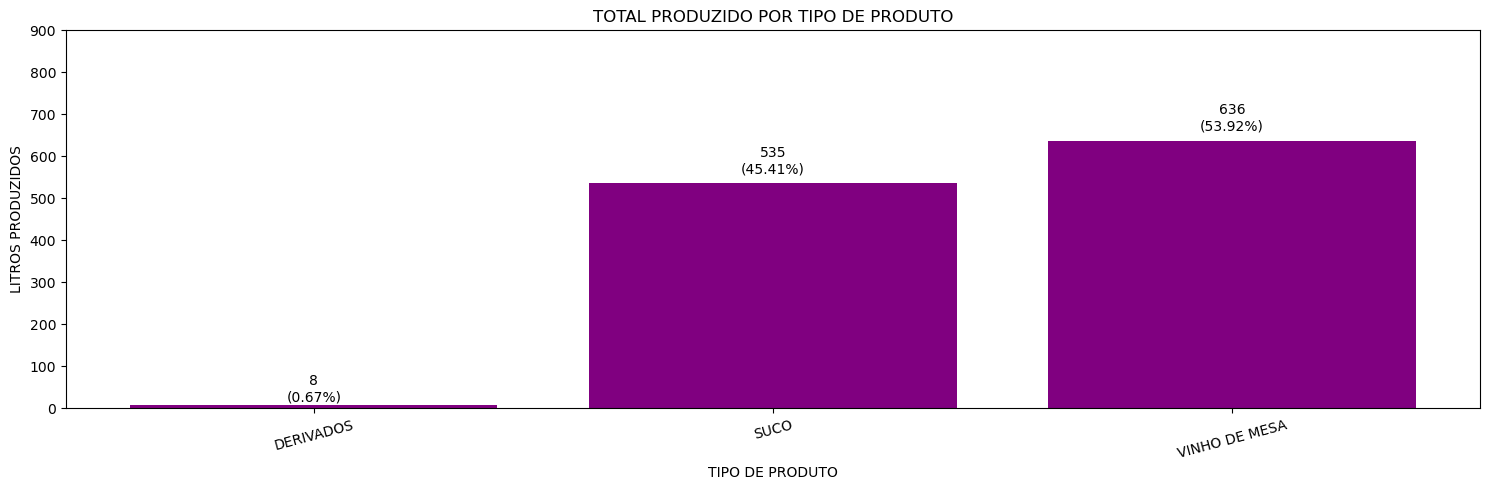

In [58]:
comercio_one2 = comercio_one[comercio_one.control.isin(
    ['VINHO DE MESA', 'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO', 'ESPUMANTES', 'SUCO DE UVAS', 'SUCO DE UVAS CONCENTRADO']
)]
comercio_one2.loc[comercio_one2.control.isin(['VINHO  FINO DE MESA']), 'control'] = 'VINHO DE MESA'
comercio_one2.loc[comercio_one2.control.isin(['VINHO FRIZANTE', 'VINHO ORGÂNICO', 'ESPUMANTES']), 'control'] = 'DERIVADOS'
comercio_one2.loc[comercio_one2.control.isin(['SUCO DE UVAS', 'SUCO DE UVAS CONCENTRADO']), 'control'] = 'SUCO'

comercio_one2 = comercio_one2[comercio_one2.Ano.isin(['2024', '2023', '2022'])]

comercio = comercio_one2.groupby('control').Litros.sum().reset_index()
comercio['Litros'] = comercio['Litros'] / 1_000_000
comercio['%'] = ((comercio.Litros / comercio.Litros.sum()) * 100).round(2)

plt.figure(figsize=(15, 5))
bars = plt.bar(comercio['control'], comercio['Litros'], color='purple')

# Adiciona os valores numéricos e as porcentagens nas barras
for bar, litros, perc in zip(bars, comercio['Litros'], comercio['%']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.03*height,
             f'{litros:,.0f}\n({perc:.2f}%)', 
             ha='center', va='bottom', fontsize=10)

plt.title('TOTAL PRODUZIDO POR TIPO DE PRODUTO')
plt.ylabel('LITROS PRODUZIDOS')
plt.xlabel('TIPO DE PRODUTO')
plt.xticks(rotation=15)
plt.ylim(0, 900)
plt.tight_layout()
plt.show()

In [59]:
comercio_one.to_csv('Base de comercialização.csv', index=False)

In [60]:
comercio_one.control.unique()

array(['VINHO DE MESA', 'vm_Tinto', 'vm_Rosado', 'vm_Branco',
       'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO',
       'VINHO ESPECIAL', 've_Tinto', 've_Rosado', 've_Branco',
       'ESPUMANTES ', 'es_Espumante_Moscatel', 'es_Espumante',
       'es_Espumante Orgânico', 'SUCO DE UVAS', 'su_Suco_Natural',
       'su_Suco_Adoçado', 'su_Suco_Reprocessado', 'su_Suco_Orgânico',
       'su_Outros_sucos', 'SUCO DE UVAS CONCENTRADO', nan,
       'ou_Outros vinhos (sem informdetalhada', 'ou_Agrin',
       'ou_Aguardente', 'ou_Alcool_vinico', 'ou_Bagaceira',
       'ou_Base_champenoise', 'ou_Base_charmat', 'ou_Base_espumante',
       'ou_Bebida', 'ou_Borra_liqwuida', 'ou_Borra_seca', 'ou_Brandy',
       'ou_Cooler', 'ou_Coquetel', 'ou_Destilado', 'ou_Filtrado_doce',
       'ou_Jeropiga', 'ou_Mistelas', 'ou_Mosto_concentrado',
       'ou_Mosto_uva', 'ou_Mosto_sulfitado', 'ou_Nectar',
       'ou_Outros_produtos', 'ou_Polpa', 'ou_Preparado_líquido',
       'ou_Refrigerante', 'ou_Sang

In [ ]:
listagem_tabelas = [
    describe_text_base # Estatistísca descritiva de números
    , describe_base # Estatistíca descritiva de texto
    , menores_paises #  10 menores países com importação do Brasil
    , maiores_paises # 10 maiores países com importação do Brasil
    , temporal # Base temporal por valor e litros dos 10 maiores países
    , temporal_top_10 # Base temporal por valor e litros dos 10 menores países
    , correlacao # Correlação dos dados de exportação com a Média de renda percapita dos países
    , exportacao_GDP # Base com a renda percapita dos países e Valor Exportado
    , preco_medio # Ticket Médio / Preço médio por litro
    , ipedata # Variação do dólar em relação ao Real
    , paises_baixo_analise # Análise comparativa dos 3 maiores países 
    , produto_full # Variação da base de produção
    , produtos # Litros por produto
]

listagem_nomes_tabelas = [
    'Describe Text'
    , 'Describe Number'
    , 'MAX Top 10 Países'
    , 'MIN Top 10 Países'
    , 'MAX Temporal'
    , 'MIN Temporal'
    , 'Correl Venda x PIB'
    , 'Full base PIB x Exportacao'
    , 'Preco Medio'
    , 'Dolar temporal'
    , 'MAX 3 Países'
    , 'Prod Litragem'
    , 'Maiores Producoes'
]

for num, tabela in enumerate(listagem_tabelas):
    pd.DataFrame().to_excel('Bases de analise.xlsx', index=False)
    with pd.ExcelWriter('Bases de analise.xlsx', mode='a', engine='openpyxl') as w:
        tabela.to_excel(w, index=False, sheet_name=listagem_nomes_tabelas[num])

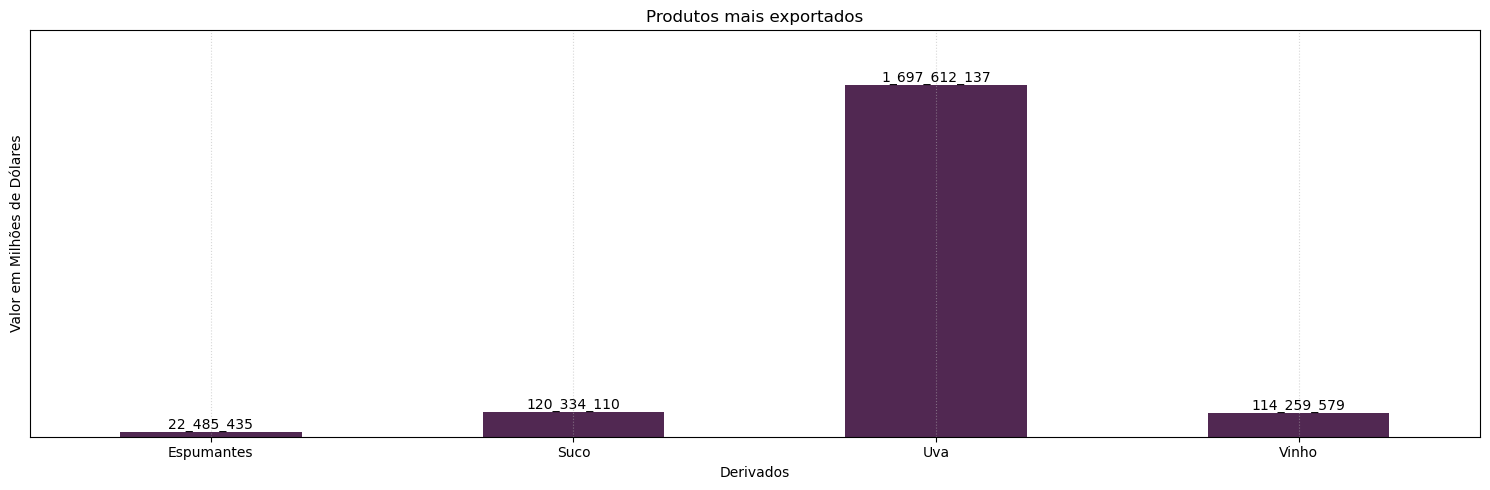

In [91]:
derivado_mais_exportado = exportacao_one.groupby('Derivados')['Dolar'].sum().reset_index()

ax = derivado_mais_exportado.plot(kind='bar', x='Derivados', y='Dolar', figsize=(15,5), legend=False, color='#512852')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:_.2f}'))
plt.title('Produtos mais exportados')
plt.grid(True, linestyle=':', alpha=0.5)
plt.ylabel('Valor em Milhões de Dólares')
plt.yticks([])
plt.xticks(rotation=0)
plt.ylim(0, 1_960_000_000)
# Adiciona rótulos nas barras com separador de milhar por underline

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, altura,
            f'{int(altura):_}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()